<a href="https://colab.research.google.com/github/AdityaGaur19/Algo-Efficiency-Assignment-2301201007/blob/main/Algo_Efficiency_Assignment_2301201007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#bubble sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

print(bubble_sort([12, 11, 13, 5, 6]))

[5, 6, 11, 12, 13]


# ***Fibonacci Algorithms***
This section presents two distinct approaches for computing the Fibonacci sequence. The first, a naive recursive implementation, directly translates the mathematical recurrence relation F(n)=F(n−1)+F(n−2). This approach is simple to understand but suffers from an exponential time complexity of O(2
n
 ) due to repeated subproblem computations. In contrast, the second implementation uses an iterative dynamic programming approach. This method builds the sequence from the bottom up, storing only the two preceding numbers at each step. This significantly improves efficiency, resulting in a linear time complexity of O(n) and a constant space complexity of O(1).

The accompanying plot, derived from performance analysis, visually demonstrates this theoretical difference. The execution time for the recursive algorithm grows rapidly and becomes impractical for values of n beyond 30, while the iterative method's runtime remains negligible.

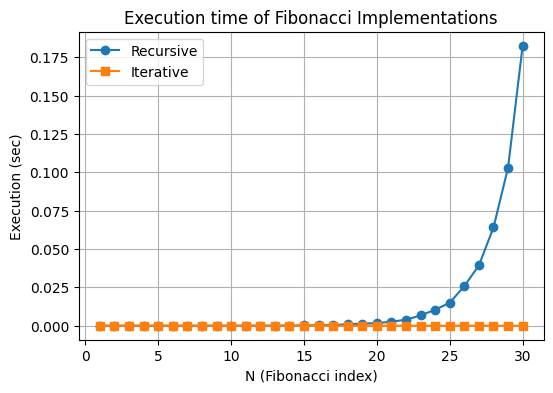

In [3]:
import matplotlib.pyplot as plt
import time

# Naive recursive implementation (O(2^n))
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

# Iterative (dynamic programming) implementation (O(n))
def fib_iterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

# Performance analysis and visualization for Fibonacci algorithms
ns = list(range(1, 31))
recursive_times = []
iterative_times = []

for i in ns:
    start = time.perf_counter()
    fib_recursive(i)
    recursive_times.append(time.perf_counter() - start)

    start = time.perf_counter()
    fib_iterative(i)
    iterative_times.append(time.perf_counter() - start)

plt.figure(figsize=(6, 4))
plt.plot(ns, recursive_times, label="Recursive", marker="o")
plt.plot(ns, iterative_times, label="Iterative", marker="s")
plt.xlabel("N (Fibonacci index)")
plt.ylabel("Execution (sec)")
plt.title("Execution time of Fibonacci Implementations")
plt.legend()
plt.grid()
plt.show()

# ***Sorting Algorithms***
This block presents the implementation of five common sorting algorithms: Merge Sort, Quick Sort, Insertion Sort, Bubble Sort, and Selection Sort. Each algorithm is distinct in its approach and performance characteristics. Merge Sort and Quick Sort, both with an average-case time complexity of O(n
logn), are highly efficient for large datasets. In contrast, the remaining three algorithms—Insertion Sort, Bubble Sort, and Selection Sort—exhibit a quadratic time complexity of O(n
2
 ) in their average and worst-case scenarios, making them impractical for large inputs.

The plot illustrates the stark performance difference in a worst-case scenario. The O(n
logn) algorithms scale far more effectively with increasing input size, whereas the O(n
2
 ) algorithms show a rapid, non-linear increase in execution time.

In [5]:
import matplotlib.pyplot as plt
import time
import random

# Merge Sort (O(n log n))
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

In [6]:
# Quick Sort (O(n log n) average case, O(n^2) worst case)
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

In [7]:
# Insertion Sort (O(n^2) average/worst case, O(n) best case)
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [8]:
# Bubble Sort (O(n^2))
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

In [9]:
# Selection Sort (O(n^2))
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

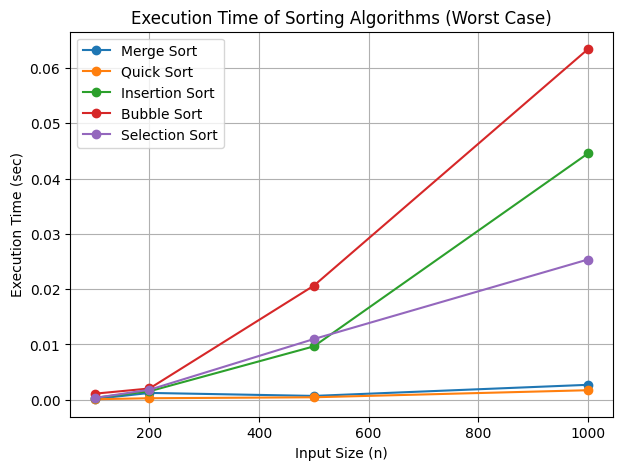

In [10]:
# Performance analysis and visualization for sorting algorithms (Worst Case)
algorithms = {
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort,
    "Insertion Sort": insertion_sort,
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort
}
ns = [100, 200, 500, 1000]
results = {name: [] for name in algorithms}

def generate_worst_case(n):
    return list(range(n, 0, -1))

for n in ns:
    arr = generate_worst_case(n)
    for name, func in algorithms.items():
        test_arr = arr.copy()
        start = time.perf_counter()
        func(test_arr)
        results[name].append(time.perf_counter() - start)

plt.figure(figsize=(7, 5))
for name, times in results.items():
    plt.plot(ns, times, marker="o", label=name)
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (sec)")
plt.title("Execution Time of Sorting Algorithms (Worst Case)")
plt.legend()
plt.grid()
plt.show()

# ***Binary Search***
Binary search is an extremely efficient algorithm for finding an element in a sorted array. Its core principle is a divide-and-conquer strategy, which allows it to halve the search space with each comparison. This results in a logarithmic time complexity of O(
logn), making it significantly faster than any linear search for large datasets.

The plot below demonstrates this efficiency by comparing the performance of binary search with a slow, O(n
2
 ) sorting algorithm (Selection Sort). The execution time for binary search is nearly instantaneous and remains flat as the input size increases, emphasizing its scalability and why it is a preferred searching technique for sorted data.

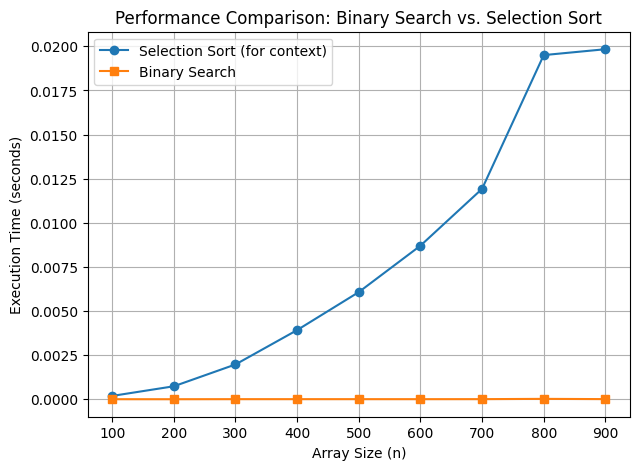

In [11]:
import matplotlib.pyplot as plt
import time
import random

# Iterative binary search (O(log n))
def binary_search(arr, x):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + h6666666666666666666666666666666666666666666666666igh) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Performance analysis and visualization for Binary Search
ns = list(range(100, 1000, 100))
selection_sort_times = []
binary_search_times = []

for n in ns:
    arr_to_sort = random.sample(range(n * 10), n)
    arr_sorted = sorted(arr_to_sort.copy())
    target = arr_sorted[n // 2]

    # Time Selection Sort
    start = time.perf_counter()
    selection_sort(arr_to_sort)
    selection_sort_times.append(time.perf_counter() - start)

    # Time Binary Search
    start = time.perf_counter()
    binary_search(arr_sorted, target)
    binary_search_times.append(time.perf_counter() - start)

plt.figure(figsize=(7, 5))
plt.plot(ns, selection_sort_times, label='Selection Sort (for context)', marker='o')
plt.plot(ns, binary_search_times, label='Binary Search', marker='s')
plt.xlabel('Array Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: Binary Search vs. Selection Sort')
plt.legend()
plt.grid(True)
plt.show()